In [1]:
#import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [2]:
data=pd.read_csv('G:/cb.csv')
data

,Special skill1,Defensive mistake,Minutes played,Battle won,Defensive performance,x,correct pass,Aerial battles won1,Shot to goal rate1,shoot on target,...,keypass,assist,goals,age,popularity,National game,club,Price1,Price2,Dribble won1
0,2,0.5,6.9,7.4,7.7,1.1,74.1,4.8,0.33,0.1,...,0.4,0,2,27,4,0,est,600,475,0.2
1,2,0.6,8.0,12.4,5.3,2.0,80.4,6.5,0.00,0.2,...,0.1,0,0,27,2,0,est,450,600,0.1
2,2,0.3,9.9,6.3,8.3,1.0,91.8,2.7,0.11,0.1,...,0.2,2,2,29,5,1,est,475,550,0.1
3,1,0.0,4.0,9.8,10.0,1.9,73.9,3.9,0.00,0.0,...,0.1,0,0,25,1,0,est,450,550,0.3
4,1,0.0,2.1,6.7,4.9,1.2,70.0,2.4,0.00,0.0,...,1.5,0,0,30,5,0,est,850,650,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2,0.6,7.5,5.2,7.0,1.7,75.6,0.8,0.00,0.0,...,0.3,0,0,28,0,0,havadar,350,350,0.3
87,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,27,0,0,havadar,250,250,0.0
88,3,0.5,1.3,6.9,10.9,1.0,90.8,4.9,0.00,0.0,...,0.0,0,0,27,0,0,havadar,65,85,0.0
89,2,0.0,2.0,7.3,4.8,2.9,71.6,1.3,0.00,0.0,...,1.3,0,0,32,0,0,havadar,200,175,0.3


In [3]:
data.isna().sum()

Special skill1           0
Defensive mistake        0
Minutes played           0
Battle won               0
Defensive performance    0
x                        0
correct pass             0
Aerial battles won1      0
Shot to goal  rate1      0
shoot on target          0
shoot                    0
keypass                  0
assist                   0
goals                    0
age                      0
popularity               0
National game            0
club                     0
Price1                   0
Price2                   0
 Dribble won1            0
dtype: int64

In [4]:
data.describe()

,Special skill1,Defensive mistake,Minutes played,Battle won,Defensive performance,x,correct pass,Aerial battles won1,Shot to goal rate1,shoot on target,shoot,keypass,assist,goals,age,popularity,National game,Price1,Price2,Dribble won1
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2.087912,0.427473,22.278022,8.613187,6.953846,1.398901,77.005495,2.973626,0.040440,0.176923,0.534066,0.429670,0.461538,0.549451,26.736264,0.769231,0.076923,269.615385,284.780220,0.391209
std,0.660780,1.292376,110.282289,9.034529,3.392191,0.744087,11.636689,1.753336,0.112536,0.364258,0.593337,0.468448,1.432230,1.301826,3.820515,1.874252,0.340939,157.404699,153.967731,0.593043
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,25.000000,20.000000,0.000000
25%,2.000000,0.000000,2.650000,6.400000,5.300000,1.000000,72.550000,1.750000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,24.000000,0.000000,0.000000,150.000000,175.000000,0.000000
50%,2.000000,0.300000,5.800000,7.500000,6.900000,1.300000,77.600000,3.000000,0.000000,0.100000,0.400000,0.300000,0.000000,0.000000,27.000000,0.000000,0.000000,225.000000,250.000000,0.200000
75%,2.000000,0.500000,8.050000,9.350000,8.500000,1.850000,83.450000,3.900000,0.000000,0.200000,0.700000,0.600000,0.000000,0.000000,29.000000,0.000000,0.000000,362.500000,375.000000,0.600000
max,4.000000,12.300000,917.000000,90.000000,30.000000,3.100000,100.000000,8.200000,0.700000,2.200000,2.300000,2.300000,10.000000,6.000000,39.000000,10.000000,2.000000,850.000000,750.000000,4.100000


In [5]:
data.corr()

,Special skill1,Defensive mistake,Minutes played,Battle won,Defensive performance,x,correct pass,Aerial battles won1,Shot to goal rate1,shoot on target,shoot,keypass,assist,goals,age,popularity,National game,Price1,Price2,Dribble won1
Special skill1,1.000000,-0.019774,0.115541,-0.024020,0.007283,-0.144431,0.068430,0.014491,-0.033398,0.170092,0.216162,-0.148513,0.121018,0.046557,0.084108,-0.118012,0.018969,-0.071780,-0.074072,-0.009347
Defensive mistake,-0.019774,1.000000,-0.047327,0.086128,-0.038384,-0.163000,-0.057764,0.369800,-0.017273,-0.082900,-0.112662,-0.163969,-0.030938,-0.013034,-0.214998,-0.064784,-0.014936,-0.147776,-0.141633,0.625436
Minutes played,0.115541,-0.047327,1.000000,-0.013707,-0.061024,-0.154025,0.075504,-0.002865,-0.046526,0.256036,0.235517,0.354115,-0.040820,-0.055483,0.094131,-0.060274,-0.027940,-0.087992,-0.079561,0.249826
Battle won,-0.024020,0.086128,-0.013707,1.000000,0.730231,-0.108126,0.280488,0.022735,-0.055687,-0.101837,-0.117238,-0.098099,-0.021943,-0.062029,-0.252241,-0.020226,-0.010073,-0.125384,-0.124962,0.033182
Defensive performance,0.007283,-0.038384,-0.061024,0.730231,1.000000,-0.163336,0.430257,0.114236,-0.001518,-0.054106,-0.200155,-0.277140,-0.040849,-0.019354,-0.119092,-0.047307,0.028083,-0.102510,-0.097539,-0.228312
x,-0.144431,-0.163000,-0.154025,-0.108126,-0.163336,1.000000,-0.088196,-0.008454,-0.057450,-0.233353,-0.040685,-0.005324,0.238196,0.032748,0.035464,-0.062328,-0.012803,-0.021633,0.014158,-0.038799
correct pass,0.068430,-0.057764,0.075504,0.280488,0.430257,-0.088196,1.000000,0.266433,0.053944,0.086901,0.059966,-0.108468,-0.001354,0.076078,0.099927,0.122123,0.201816,0.069379,0.069002,-0.072735
Aerial battles won1,0.014491,0.369800,-0.002865,0.022735,0.114236,-0.008454,0.266433,1.000000,-0.063686,-0.209732,-0.152605,-0.226982,-0.071203,-0.037392,0.043735,0.176314,0.150271,-0.031017,0.001583,0.075750
Shot to goal rate1,-0.033398,-0.017273,-0.046526,-0.055687,-0.001518,-0.057450,0.053944,-0.063686,1.000000,0.172913,0.328922,0.096704,0.245523,0.633897,-0.002570,0.161685,0.233681,0.287014,0.249458,-0.019753
shoot on target,0.170092,-0.082900,0.256036,-0.101837,-0.054106,-0.233353,0.086901,-0.209732,0.172913,1.000000,0.715191,0.168149,0.165468,0.322270,0.148075,0.083253,0.086028,0.231810,0.256865,0.080833


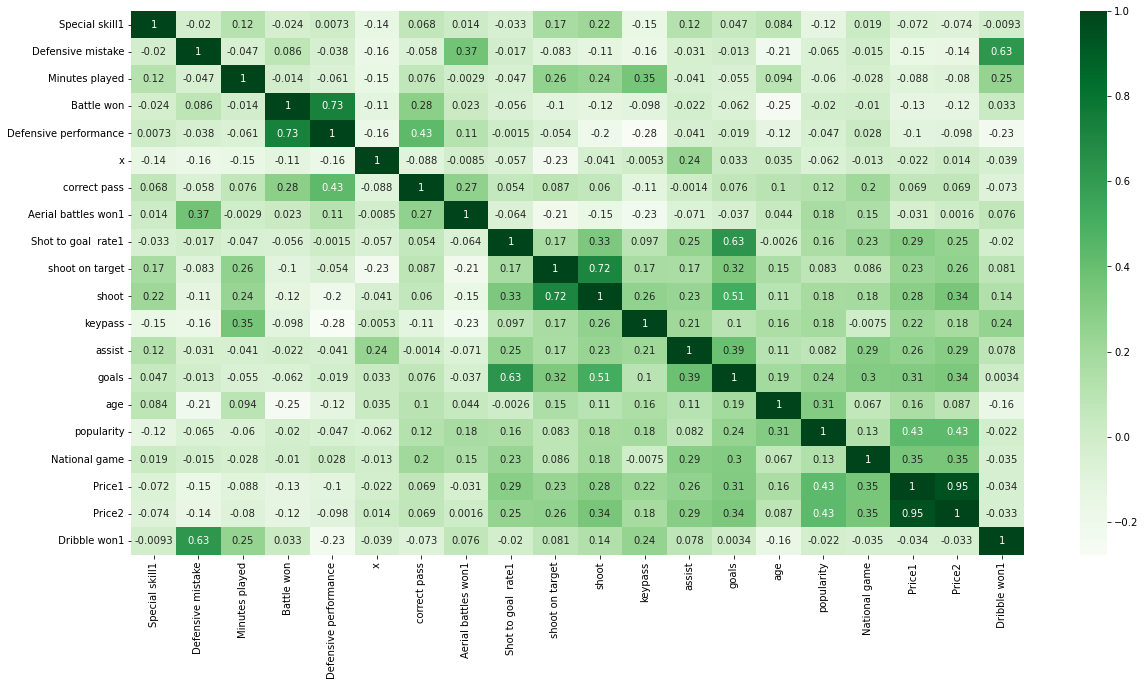

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


df = pd.DataFrame(data)

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

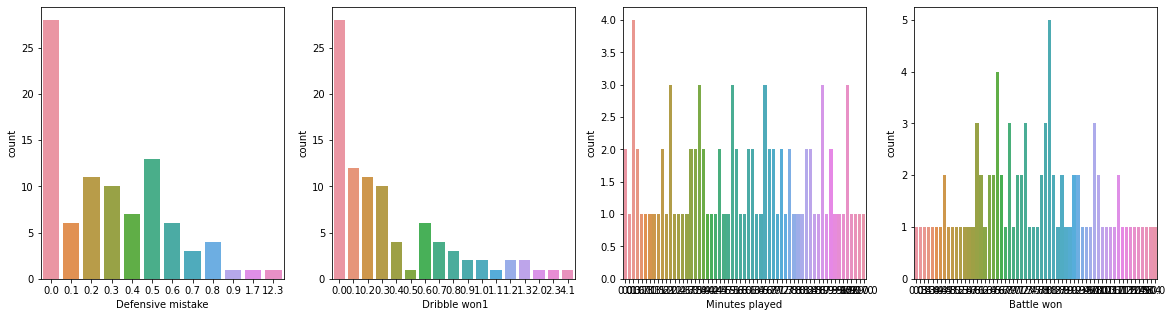

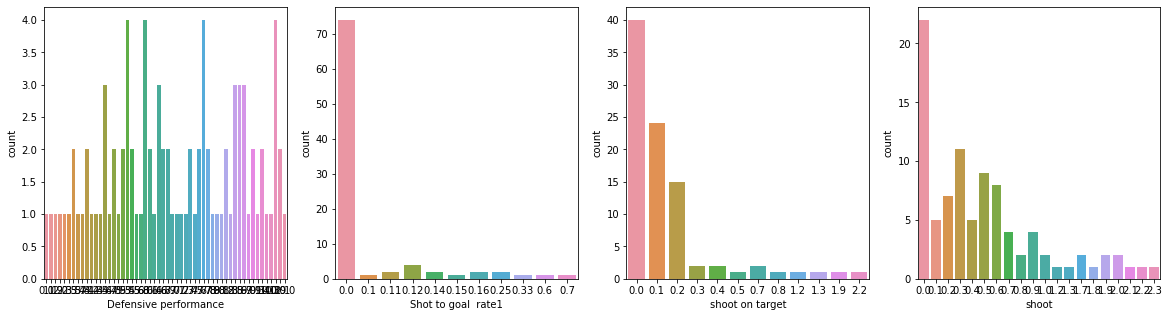

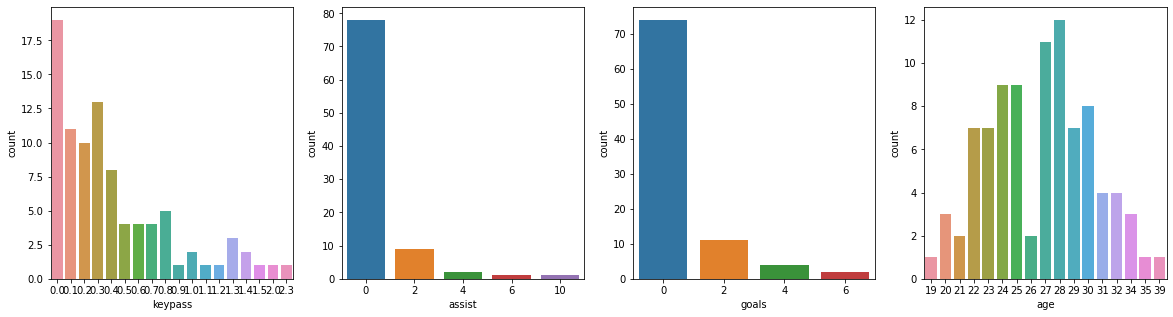

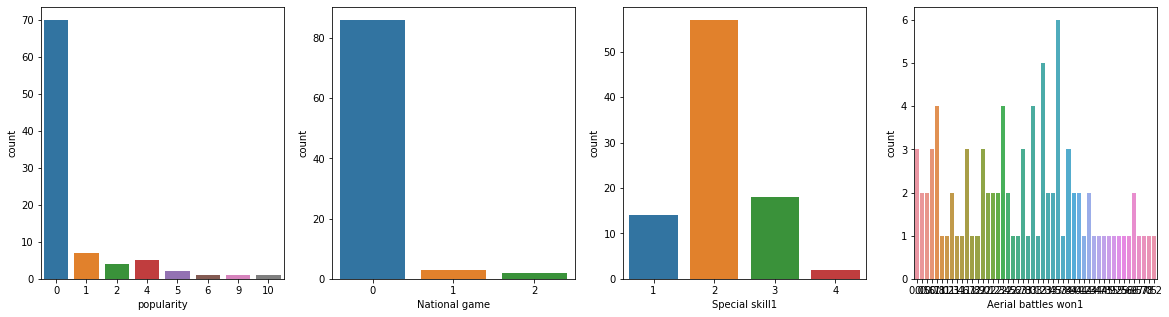

In [7]:
categorical=categorical=[ 'Defensive mistake',' Dribble won1','Minutes played','Battle won','Defensive performance','Shot to goal  rate1','shoot on target','shoot','keypass','assist','goals','age','popularity','National game' ,'Special skill1','Aerial battles won1']
i=0
while i<16:
    fig=plt.figure(figsize=[20,5])
    plt.subplot(1,4,1)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    
    plt.subplot(1,4,2)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    plt.subplot(1,4,3)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    plt.subplot(1,4,4)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    
    plt.show

<AxesSubplot:xlabel='correct pass', ylabel='count'>

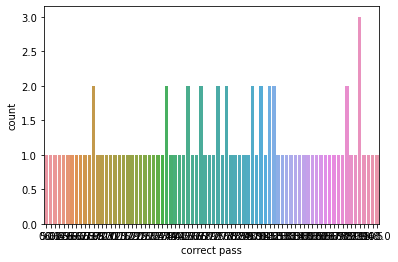

In [8]:
sns.countplot(data['correct pass'])

<AxesSubplot:xlabel='x', ylabel='count'>

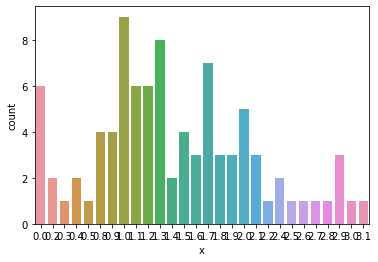

In [9]:
sns.countplot(data['x'])

<AxesSubplot:xlabel='Price1', ylabel='count'>

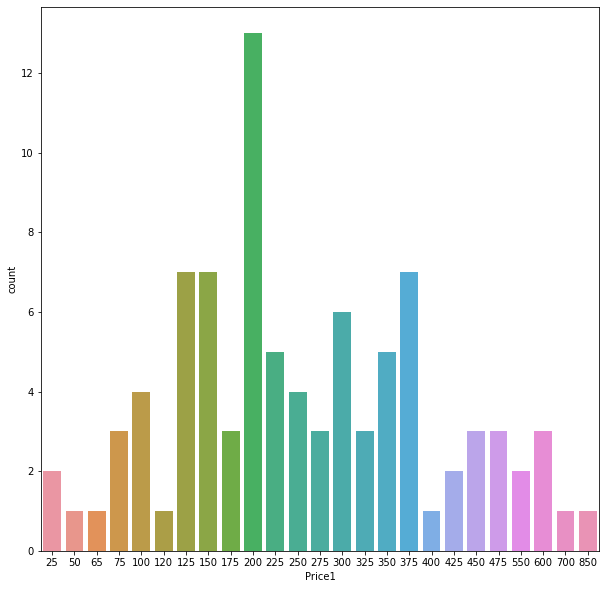

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(data['Price1'])

<AxesSubplot:xlabel='club', ylabel='count'>

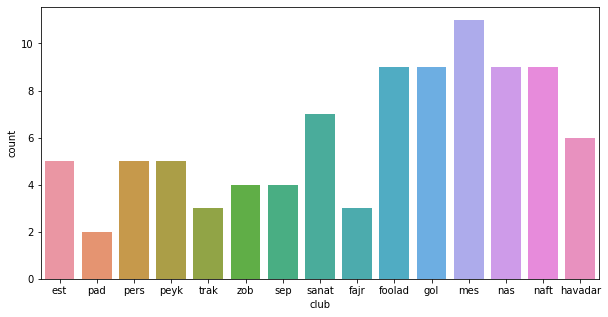

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data['club'])

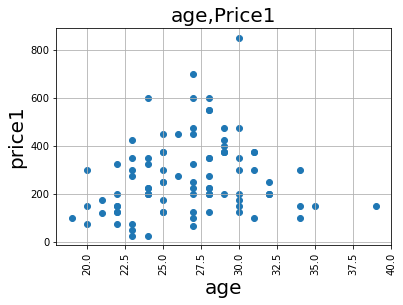

In [12]:
plt.scatter(data['age'],data['Price1'])
plt.title('age,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('age',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

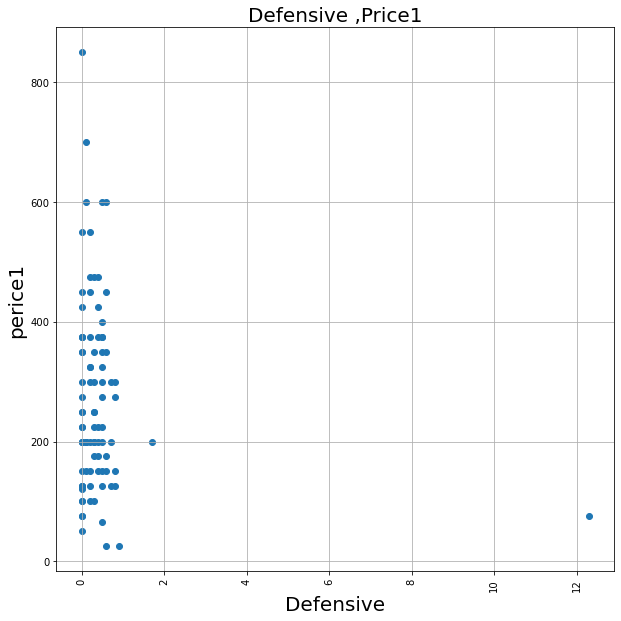

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(data['Defensive mistake'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

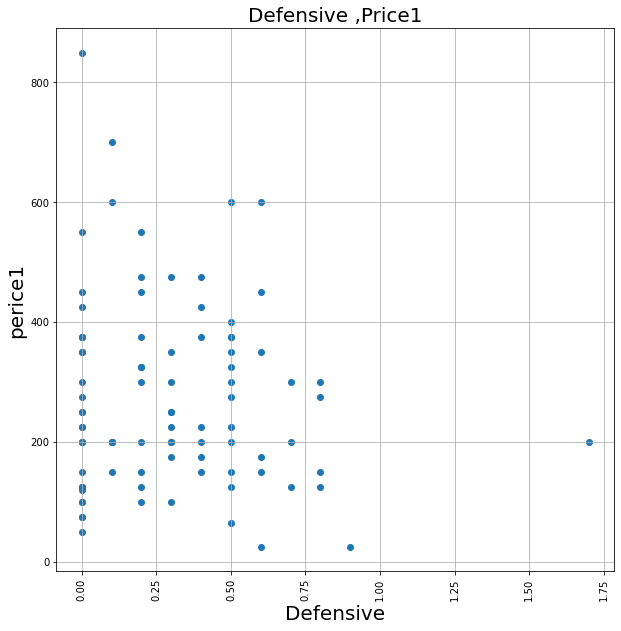

In [14]:
df=data[data["Defensive mistake"]<12]
plt.figure(figsize=(10,10))
plt.scatter(df['Defensive mistake'],df['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

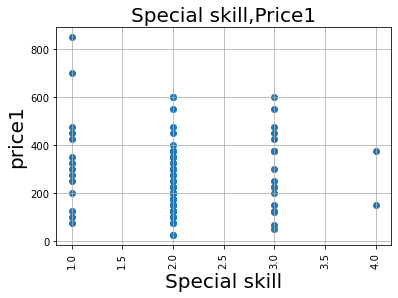

In [15]:
plt.scatter(data['Special skill1'],data['Price1'])
plt.title('Special skill,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('Special skill',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

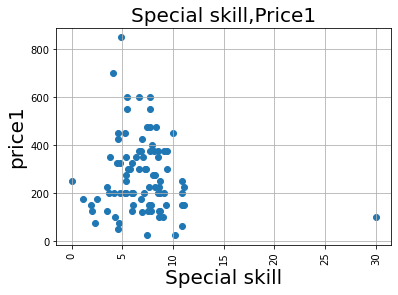

In [16]:

plt.scatter(df['Defensive performance'],df['Price1'])
plt.title('Special skill,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('Special skill',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

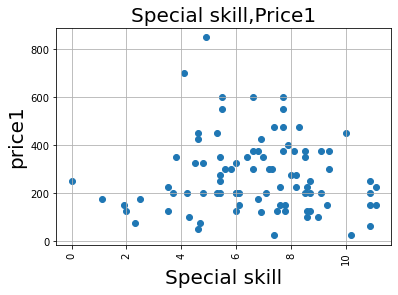

In [17]:
df2=df[df["Defensive performance"]<30]

plt.scatter(df2['Defensive performance'],df2['Price1'])
plt.title('Special skill,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('Special skill',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

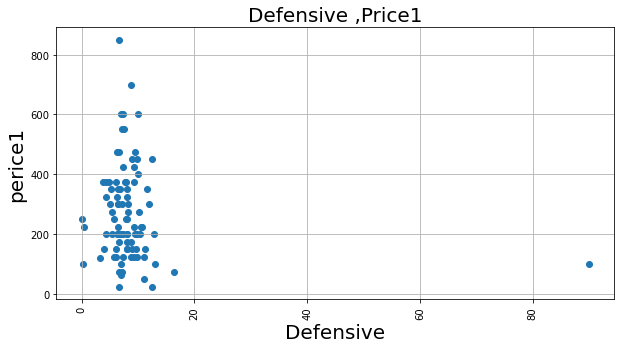

In [18]:
df2=df[df["Battle won"]<80]
plt.figure(figsize=(10,5))
plt.scatter(data['Battle won'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

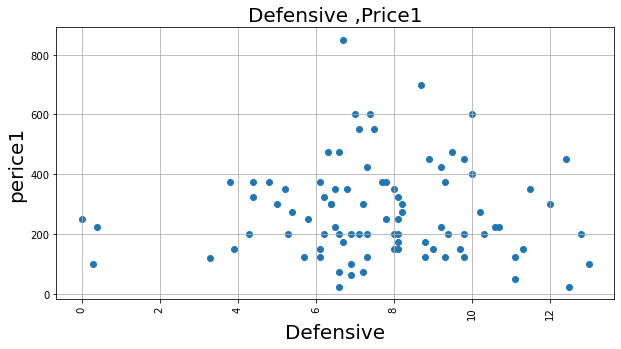

In [19]:
df3=df2[df2["Battle won"]<80]
plt.figure(figsize=(10,5))
plt.scatter(df3['Battle won'],df3['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

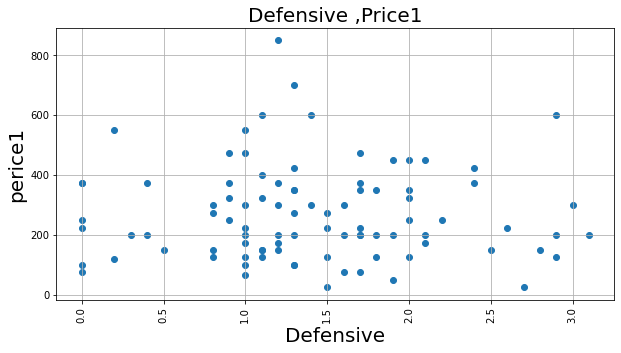

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(data['x'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

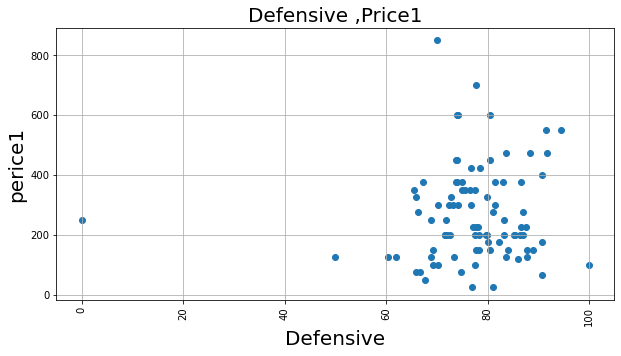

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(data['correct pass'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

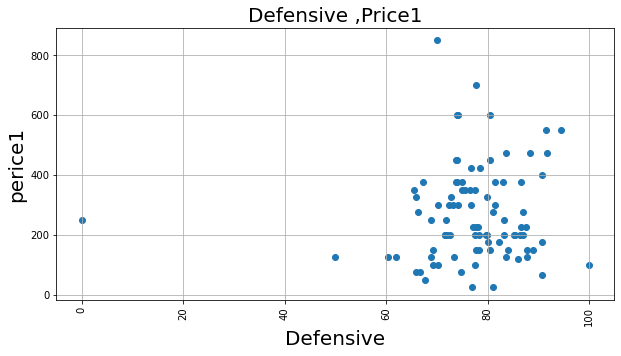

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(data['correct pass'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

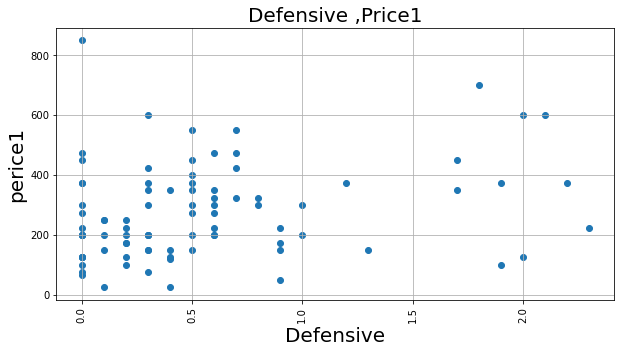

In [23]:
df4=df3[df3["Battle won"]>0]
plt.figure(figsize=(10,5))
plt.scatter(df4['shoot'],df4['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

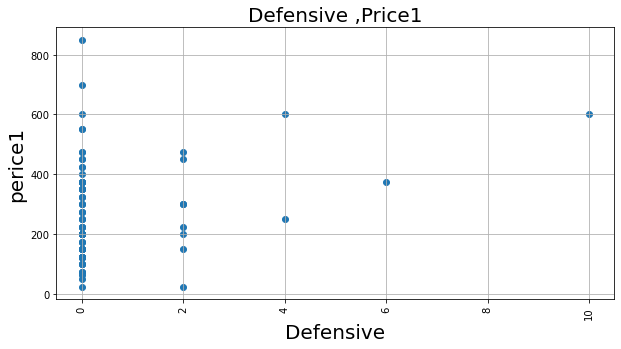

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(data['assist'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

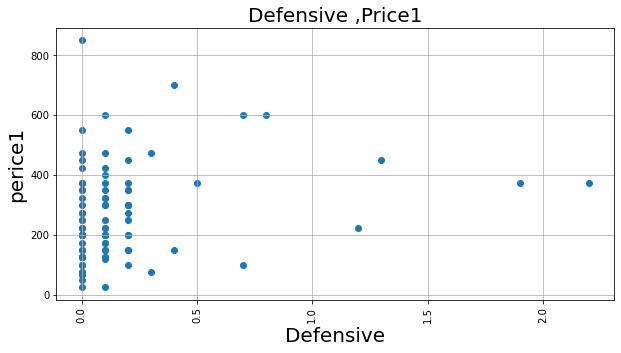

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(data['shoot on target'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

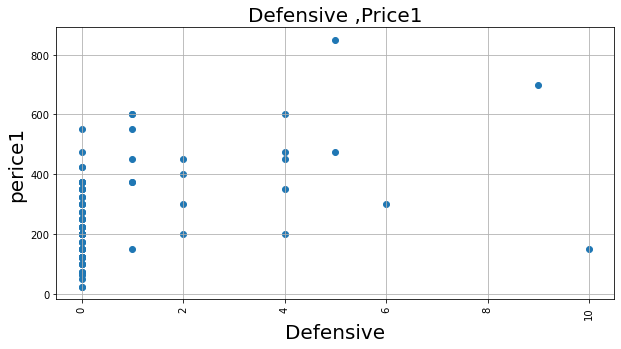

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(data['popularity'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

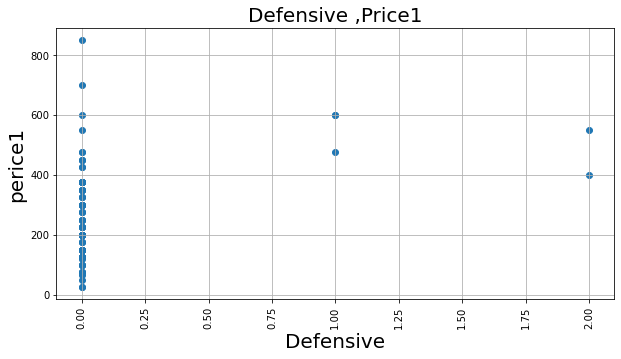

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(data['National game'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

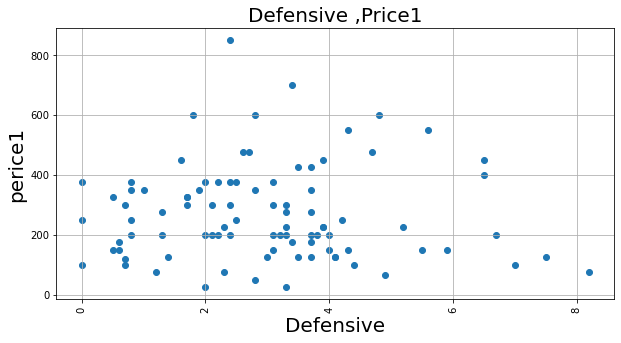

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(data['Aerial battles won1'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

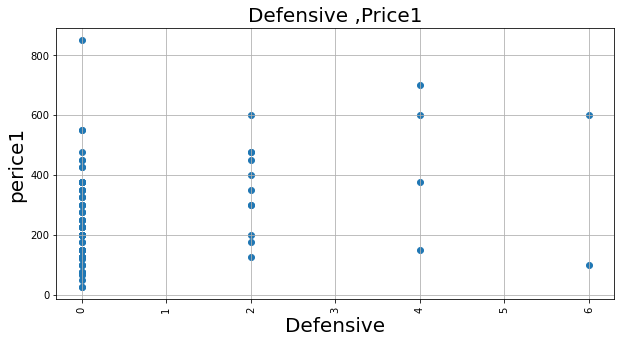

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(data['goals'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

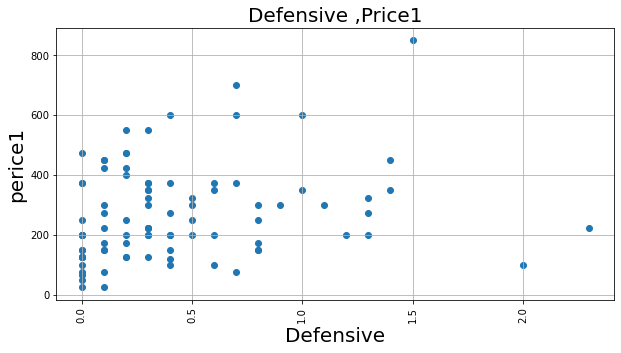

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(data['keypass'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

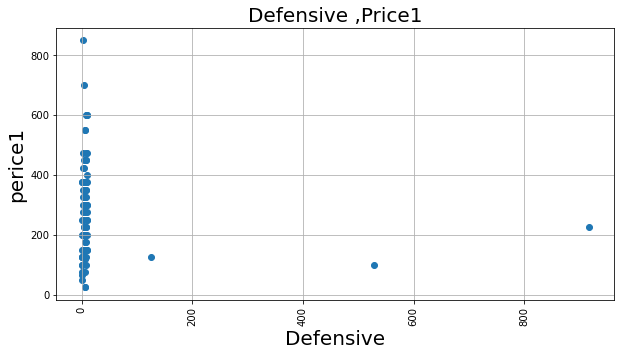

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(data['Minutes played'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

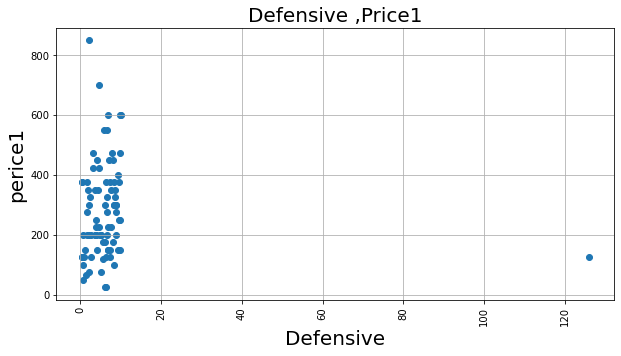

In [32]:
df5=df4[df4["Minutes played"]<400]
plt.figure(figsize=(10,5))
plt.scatter(df5['Minutes played'],df5['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

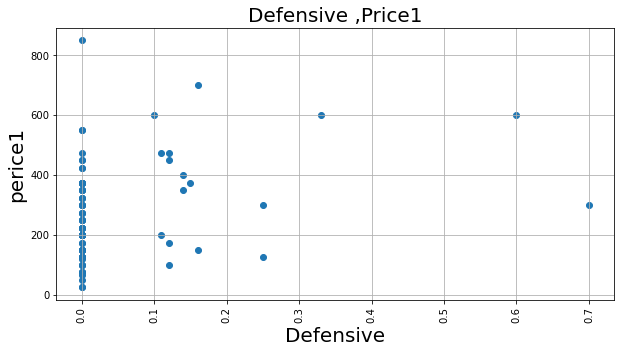

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(data['Shot to goal  rate1'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

<Figure size 1440x720 with 0 Axes>

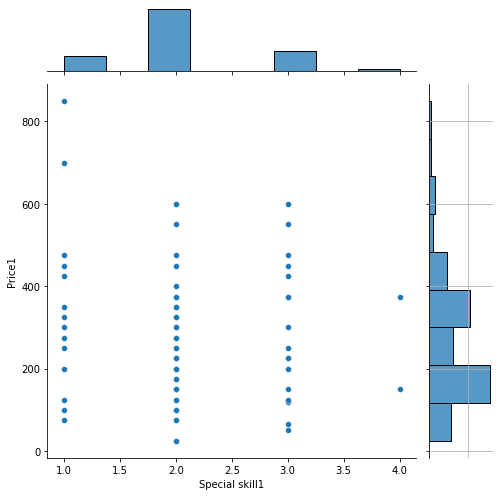

In [34]:
plt.figure(figsize=(20,10))
sns.jointplot(y='Price1',x='Special skill1',data=data,kind='scatter',size=7)
plt.grid()
plt.show()

<AxesSubplot:xlabel='Special skill1', ylabel='Battle won'>

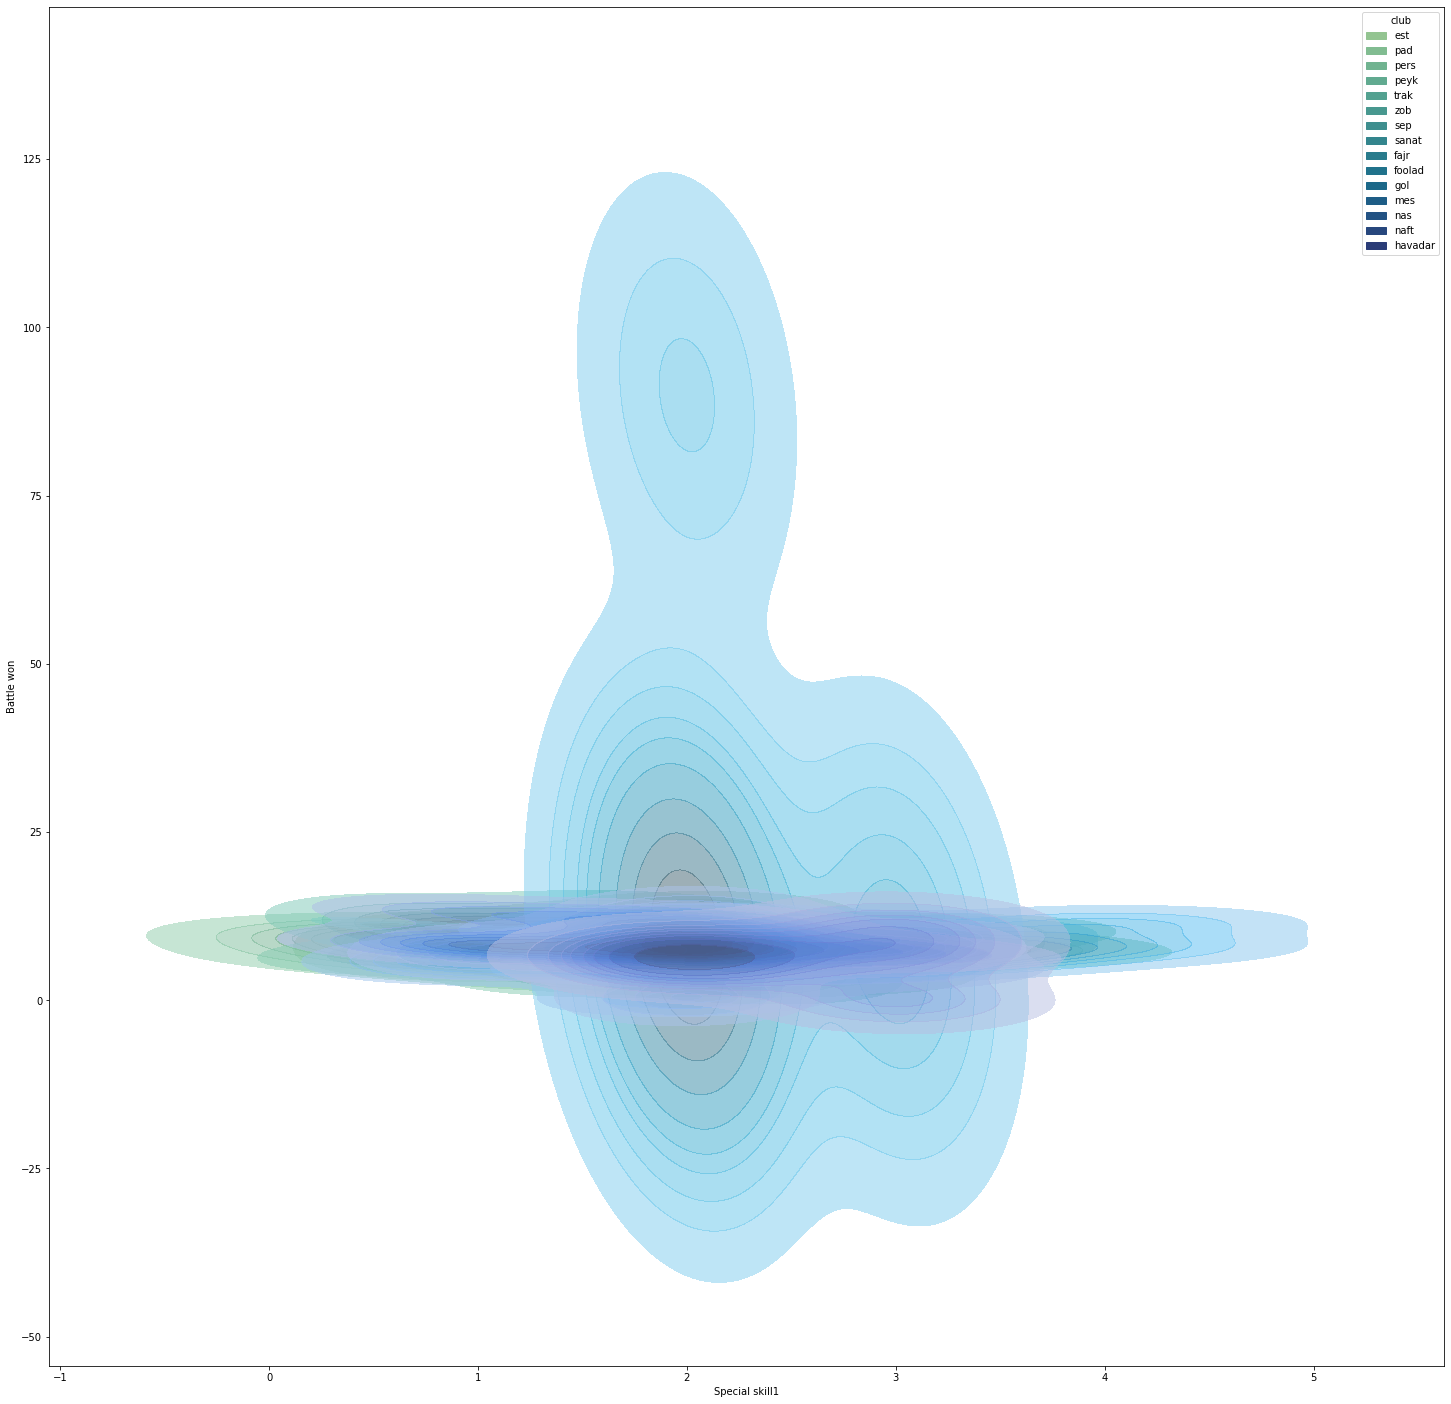

In [35]:

fig=plt.figure(figsize=[25,25])
sns.kdeplot(data['Special skill1'],data['Battle won'],hue=data['club'],shade=True,fill=True,common_norm=False,palette="crest",alpha=.5,linewidth=1)


In [36]:
df5
club1=df5.club.replace(to_replace=['est','pad','pers','peyk','trak','zob','sep','sanat','fajr','foolad','gol','mes','nas','naft','havadar'], value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])#111
df5.insert(10,"club1",club1)

<AxesSubplot:xlabel='club1', ylabel='count'>

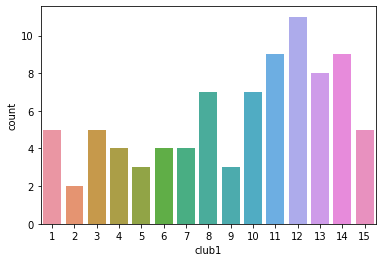

In [37]:
sns.countplot(df5['club1'])

In [38]:
df5

,Special skill1,Defensive mistake,Minutes played,Battle won,Defensive performance,x,correct pass,Aerial battles won1,Shot to goal rate1,shoot on target,...,keypass,assist,goals,age,popularity,National game,club,Price1,Price2,Dribble won1
0,2,0.5,6.9,7.4,7.7,1.1,74.1,4.8,0.33,0.1,...,0.4,0,2,27,4,0,est,600,475,0.2
1,2,0.6,8.0,12.4,5.3,2.0,80.4,6.5,0.00,0.2,...,0.1,0,0,27,2,0,est,450,600,0.1
2,2,0.3,9.9,6.3,8.3,1.0,91.8,2.7,0.11,0.1,...,0.2,2,2,29,5,1,est,475,550,0.1
3,1,0.0,4.0,9.8,10.0,1.9,73.9,3.9,0.00,0.0,...,0.1,0,0,25,1,0,est,450,550,0.3
4,1,0.0,2.1,6.7,4.9,1.2,70.0,2.4,0.00,0.0,...,1.5,0,0,30,5,0,est,850,650,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2,0.0,5.1,6.6,4.7,1.7,74.7,1.2,0.00,0.0,...,0.1,0,0,23,0,0,havadar,75,125,0.8
86,2,0.6,7.5,5.2,7.0,1.7,75.6,0.8,0.00,0.0,...,0.3,0,0,28,0,0,havadar,350,350,0.3
88,3,0.5,1.3,6.9,10.9,1.0,90.8,4.9,0.00,0.0,...,0.0,0,0,27,0,0,havadar,65,85,0.0
89,2,0.0,2.0,7.3,4.8,2.9,71.6,1.3,0.00,0.0,...,1.3,0,0,32,0,0,havadar,200,175,0.3


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [84]:
x= pd.DataFrame(df5, columns = ['Defensive mistake','Minutes played','Battle won','Defensive performance','x','Aerial battles won1','shoot on target','keypass','assist','goals','age','popularity','National game',' Dribble won1'
])
y=df5['Price2'].values.reshape(-1,1)
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.1 ,random_state=0)
model = LinearRegression ()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute eror: 41.95570411212049
Mean Squared Error: 2756.3373933756943
Root Mean Squared Error: 52.500832311266215
R2 Score: 0.7845468479001869


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [42]:
model_new=LinearRegression ()
kfold_validation=KFold(20)
results=cross_val_score(model_new,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[-1.86613124e+01 -5.88153704e+00  2.27749419e-01 -1.71801844e+00
 -8.41211471e-01 -1.67681223e+00  5.15932361e-01 -2.02848995e+01
 -1.38335003e+00  8.98687091e-01 -2.98776456e+00 -2.07783778e+00
 -7.36222201e+00 -5.75066462e-01  2.50081136e-01 -2.39653552e+02
 -1.28142096e+01 -2.47248315e+00 -3.29860992e-01 -8.94404376e-01]
-15.886104610915293


In [82]:
dfa=df5[df5.index<44]
dfa1=df5[df5.index>48]
dfa2=dfa.append(dfa1)
dfa2.reset_index(drop=True,inplace=True)
x= pd.DataFrame(dfa2, columns = ['Defensive mistake','Minutes played','Battle won','Defensive performance','x','Aerial battles won1','shoot on target','keypass','assist','goals','age','popularity','National game',' Dribble won1'
])
y=dfa2['Price1'].values.reshape(-1,1)
X_train1,X_test1,y_train1,y_test1 =train_test_split(x,y,test_size=0.1 ,random_state=0)
modelnew = LinearRegression ()
modelnew.fit(X_train1,y_train1)
y_pred1=modelnew.predict(X_test1)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test1,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test1,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test1,y_pred1))
#44-48

Mean Absolute eror: 64.94675666885074
Mean Squared Error: 5699.871822772566
Root Mean Squared Error: 75.49749547350936
R2 Score: 0.7504380445164445


In [44]:
x= pd.DataFrame(df5, columns = ['Defensive mistake','Minutes played','Battle won','Defensive performance','x','Aerial battles won1','shoot on target','keypass','assist','goals','age','popularity','National game',' Dribble won1'
])
y=df5['Price2'].values.reshape(-1,1)

from sklearn import svm
X_train2,X_test2,y_train2,y_test2 =train_test_split(x,y,test_size=0.1 ,random_state=0)
regr = svm.SVR()
regr.fit(X_train2,y_train2)
y_pred2=regr.predict(X_test2)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test2,y_pred2))
print('Mean Squared Error:',metrics.mean_squared_error(y_test2,y_pred2))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test2,y_pred2)))
print('R2 Score:',metrics.r2_score(y_test2,y_pred2))
#42,46

Mean Absolute eror: 74.85796569195313
Mean Squared Error: 12941.123778872927
Root Mean Squared Error: 113.759060205651
R2 Score: -0.011561906961357726


In [45]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#from sklearn.model_selection import GridSearchCV
x= pd.DataFrame(df5, columns = ['Defensive mistake','Minutes played','Battle won','Defensive performance','x','Aerial battles won1','shoot on target','keypass','assist','goals','age','popularity','National game',' Dribble won1'
])
y=df5['Price2'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=42)



from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostRegressor

svr = SVR(kernel='rbf', degree=2, 
          gamma='scale',
          coef0=1, tol=0.01,
          C=0.8, epsilon=0.1, shrinking=False, 
          cache_size=100, verbose=False, max_iter=- 1)

regr = make_pipeline(StandardScaler(), svr)

adaboostSVR=AdaBoostRegressor(base_estimator=regr,n_estimators=7,
                              random_state=42,
                 learning_rate=0.9)



adaboostSVR.fit(x_train,y_train)

yadaboost = adaboostSVR.predict(x_test)
mse_svr3 = mean_squared_error(y_test,yadaboost)
print('The RMSE of ADA is:',np.sqrt(mse_svr3))

print('The MAE of ADA is:',mean_absolute_error(y_test,yadaboost))
                   
print('The R2 of ADA is:',r2_score(y_test,yadaboost))                   
                   
              

NameError: name 'mean_squared_error' is not defined

In [46]:
from sklearn import tree
X_train3,X_test3,y_train3,y_test3 =train_test_split(x,y,test_size=0.1 ,random_state=0)
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train3,y_train3)
y_pred3=clf.predict(X_test3)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test3,y_pred3))
print('Mean Squared Error:',metrics.mean_squared_error(y_test3,y_pred3))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test3,y_pred)))
print('R2 Score:',metrics.r2_score(y_test3,y_pred3))

Mean Absolute eror: 143.33333333333334
Mean Squared Error: 35788.88888888889
Root Mean Squared Error: 52.500832311266215
R2 Score: -1.7974909529553678


# the best model is 

In [85]:
x= pd.DataFrame(df5, columns = ['Defensive mistake','Minutes played','Battle won','Defensive performance','x','Aerial battles won1','shoot on target','keypass','assist','goals','age','popularity','National game',' Dribble won1'
])
y=df5['Price1'].values.reshape(-1,1)
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.1 ,random_state=0)
model = LinearRegression ()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute eror: 50.45040988512528
Mean Squared Error: 4049.071346150658
Root Mean Squared Error: 63.632313694778205
R2 Score: 0.6164037672067798


In [87]:
dfa=df5[df5.index<44]
dfa1=df5[df5.index>48]
dfa2=dfa.append(dfa1)
dfa2.reset_index(drop=True,inplace=True)
x= pd.DataFrame(dfa2, columns = ['Defensive mistake','Minutes played','Battle won','Defensive performance','x','Aerial battles won1','shoot on target','keypass','assist','goals','age','popularity','National game',' Dribble won1'
])
y=dfa2['Price1'].values.reshape(-1,1)
X_train1,X_test1,y_train1,y_test1 =train_test_split(x,y,test_size=0.1 ,random_state=0)
modelnew = LinearRegression ()
modelnew.fit(X_train1,y_train1)
y_pred1=modelnew.predict(X_test1)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test1,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test1,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test1,y_pred1))
#44-48

Mean Absolute eror: 64.94675666885074
Mean Squared Error: 5699.871822772566
Root Mean Squared Error: 75.49749547350936
R2 Score: 0.7504380445164445


In [53]:
x

,Defensive mistake,Minutes played,Battle won,Defensive performance,x,Aerial battles won1,shoot on target,keypass,assist,goals,age,popularity,National game,Dribble won1
0,0.5,6.9,7.4,7.7,1.1,4.8,0.1,0.4,0,2,27,4,0,0.2
1,0.6,8.0,12.4,5.3,2.0,6.5,0.2,0.1,0,0,27,2,0,0.1
2,0.3,9.9,6.3,8.3,1.0,2.7,0.1,0.2,2,2,29,5,1,0.1
3,0.0,4.0,9.8,10.0,1.9,3.9,0.0,0.1,0,0,25,1,0,0.3
4,0.0,2.1,6.7,4.9,1.2,2.4,0.0,1.5,0,0,30,5,0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,5.1,6.6,4.7,1.7,1.2,0.0,0.1,0,0,23,0,0,0.8
86,0.6,7.5,5.2,7.0,1.7,0.8,0.0,0.3,0,0,28,0,0,0.3
88,0.5,1.3,6.9,10.9,1.0,4.9,0.0,0.0,0,0,27,0,0,0.0
89,0.0,2.0,7.3,4.8,2.9,1.3,0.0,1.3,0,0,32,0,0,0.3


In [88]:
Defensivemistake=float(input("Defensive mistake for (CB_RB_LB)player  is "))
Minutesplayed=float(input("Minutes played for (CB_RB_LB)playeris a"))
Battlewon=float(input("Battle won for (CB_RB_LB)player is "))
Defensiveperformance=float(input("Defensive performance for (CB_RB_LB)player is "))
Tackleswon=float(input("Tackles won is"))
Aerialbattleswon1=float(input("Aerial battles won1 for (CB_RB_LB)player is "))

shootontarget=float(input("shoot on target for (CB_RB_LB)player is "))

keypass=float(input("keypass for (CB_RB_LB)player is "))
assist=float(input("assist for (CB_RB_LB)player is")) 
goals=float(input("goals  for (CB_RB_LB)player is"))

age=float(input("age  for (CB_RB_LB)player is"))
popularity =float(input("popularity   for (CB_RB_LB)player is")) 
Nationalgame=float(input("National game  for (CB_RB_LB)player is"))
Dribblewon1=float(input("Dribble won1  for (CB_RB_LB)player  is"))
p2=modelnew.predict([[Defensivemistake,Minutesplayed,Battlewon,Defensiveperformance,Tackleswon 
,Aerialbattleswon1,shootontarget,keypass,assist,goals,age,popularity,Nationalgame,Dribblewon1]])
p2

Defensive mistake for (CB_RB_LB)player  is 0.5
Minutes played for (CB_RB_LB)playeris a6.9
Battle won for (CB_RB_LB)player is 7.4
Defensive performance for (CB_RB_LB)player is 7.7
Tackles won is1.1
Aerial battles won1 for (CB_RB_LB)player is 4.8
shoot on target for (CB_RB_LB)player is 0.1
keypass for (CB_RB_LB)player is 0.4
assist for (CB_RB_LB)player is0
goals  for (CB_RB_LB)player is2
age  for (CB_RB_LB)player is27
popularity   for (CB_RB_LB)player is4
National game  for (CB_RB_LB)player is0
Dribble won1  for (CB_RB_LB)player  is0.2


array([[357.19248019]])

In [52]:
0.5	6.9	7.4	7.7	1.1	4.8	0.1	0.4	0	2	27	4	0	0.2

array([[375.35739994]])